In [32]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, LpStatus, value

# 問題設定
problem = LpProblem("mTSP_with_Node_Constraints", LpMinimize)

# ノードとエッジの設定
nodes = [1, 2, 3, 4]  # ノード番号
# 同じノード間の移動を除外し、エッジコストを定義
edges = {(i, j): 1 for i in nodes for j in nodes if i != j}

salesmen = [1, 2]  # セールスマンの人数

# 変数の定義
x = LpVariable.dicts('x', [(i, j, k) for i in nodes for j in nodes for k in salesmen], 0, 1, LpBinary)

# 目的関数: 総コストの最小化
problem += lpSum(edges[i, j] * x[i, j, k] for i in nodes for j in nodes if i != j for k in salesmen)


# 制約: 各ノードは1回だけ訪問される
for j in nodes:
    problem += lpSum(x[i, j, k] for i in nodes if i != j for k in salesmen) == 1

# 始点と終点が同じ
for k in salesmen:
    problem += lpSum(x[1, j, k] for j in nodes if j != 1) == 1  # 始点から1度だけ出発
    problem += lpSum(x[i, 1, k] for i in nodes if i != 1) == 1  # 終点に1度だけ戻る

# 特定のノードに関する制約
# 例: セールスマン1はノード2を通過しなければならない
problem += lpSum(x[2, j, 1] for j in nodes if j != 2) >= 1
problem += lpSum(x[i, 2, 1] for i in nodes if i != 2) >= 1

# 例: セールスマン2はノード3を通過してはならない
problem += lpSum(x[3, j, 2] for j in nodes if j != 3) == 0
problem += lpSum(x[i, 3, 2] for i in nodes if i != 3) == 0

# 問題を解く
problem.solve()

# 結果の出力
print(f"Status: {LpStatus[problem.status]}")
print(f"Objective value: {value(problem.objective)}")

# 各セールスマンのルート出力
for k in salesmen:
    print(f"Salesman {k} route:")
    for i in nodes:
        for j in nodes:
            if i != j and value(x[i, j, k]) == 1:
                print(f"{i} -> {j}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/88ca0764b1ec4465ad8ca4e81f84e98e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/88ca0764b1ec4465ad8ca4e81f84e98e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 138 RHS
At line 151 BOUNDS
At line 176 ENDATA
Problem MODEL has 12 rows, 24 columns and 48 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Infeasible
Objective value: 5.0
Salesman 1 route:
1 -> 4
2 -> 1
3 -> 2
4 -> 3
Salesman 2 route:
1 -> 4
2 -> 1


In [35]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, LpStatus, value
import random 

# シード固定
random.seed(0)

# 問題設定
problem = LpProblem("mTSP_with_Node_Constraints", LpMinimize)

# ノードとエッジの設定
nodes = [1, 2, 3, 4, 5]  # ノード番号
edges = {(i, j): random.random() for i in nodes for j in nodes if i != j}  # コストは1で固定

salesmen = [1]  # セールスマンの人数

# 変数の定義
x = LpVariable.dicts('x', [(i, j, k) for i in nodes for j in nodes for k in salesmen], 0, 1, LpBinary)

# 各セールスマンのコストを表す変数
costs = LpVariable.dicts('cost', salesmen, lowBound=0, cat='Continuous')

# 全セールスマンの最大コストと最小コストを表す変数
max_cost = LpVariable('max_cost', lowBound=0, cat='Continuous')
min_cost = LpVariable('min_cost', lowBound=0, cat='Continuous')

# 各セールスマンのコストを計算
for k in salesmen:
    problem += costs[k] == lpSum(edges[i, j] * x[i, j, k] for i in nodes for j in nodes if i != j)

# 最大コストと最小コストを制約により定義
problem += max_cost >= lpSum(costs[k] for k in salesmen)
problem += min_cost <= lpSum(costs[k] for k in salesmen)

# 目的関数: 最大コストと最小コストの差を最小化
problem += max_cost - min_cost

# 制約: 各ノードは1回だけ訪問される
for j in nodes:
    problem += lpSum(x[i, j, k] for i in nodes if i != j for k in salesmen) == 1

# 始点と終点が同じ
for k in salesmen:
    problem += lpSum(x[1, j, k] for j in nodes if j != 1) == 1  # 始点から1度だけ出発
    problem += lpSum(x[i, 1, k] for i in nodes if i != 1) == 1  # 終点に1度だけ戻る

# 特定のノードに関する制約
# 例: セールスマン1はノード2を通過しなければならない
problem += lpSum(x[2, j, 1] for j in nodes if j != 2) >= 1
problem += lpSum(x[i, 2, 1] for i in nodes if i != 2) >= 1

# # 例: セールスマン2はノード3を通過してはならない
# problem += lpSum(x[3, j, 2] for j in nodes if j != 3) == 0
# problem += lpSum(x[i, 3, 2] for i in nodes if i != 3) == 0

# 問題を解く
problem.solve()

# 結果の出力
print(f"Status: {LpStatus[problem.status]}")
print(f"Objective value (Max Cost - Min Cost): {value(problem.objective)}")

# 各セールスマンのコスト出力
for k in salesmen:
    print(f"Salesman {k} cost: {value(costs[k])}")

# 各セールスマンのルート出力
for k in salesmen:
    print(f"Salesman {k} route:")
    for i in nodes:
        for j in nodes:
            if i != j and value(x[i, j, k]) == 1:
                print(f"{i} -> {j}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/a35b78c995c944929cb860dba7d9f822-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/a35b78c995c944929cb860dba7d9f822-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 17 COLUMNS
At line 121 RHS
At line 134 BOUNDS
At line 155 ENDATA
Problem MODEL has 12 rows, 23 columns and 61 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -4.44089e-16 - 0.00 seconds
Cgl0004I processed model has 8 rows, 21 columns (20 integer (20 of which binary)) and 49 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 2.22045e-16
Cbc0038I Solution found of 0
Cbc0038I Relaxing continuous gives 0
Cbc0038I Before mini branch and bound, 20 integers at bound fixed and 0 co

In [8]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, LpStatus, value

# 問題設定
problem = LpProblem("mTSP_with_Node_Constraints", LpMinimize)

# ノードとエッジの設定
nodes = [1, 2, 3, 4]  # ノード番号
edges = {(i, j): 1 for i in nodes for j in nodes if i != j}  # コストは1で固定

salesmen = [1, 2]  # セールスマンの人数

# 変数の定義
x = LpVariable.dicts('x', [(i, j, k) for i in nodes for j in nodes for k in salesmen], 0, 1, LpBinary)

# フロー変数（サブツアー除去制約のための補助変数）
u = LpVariable.dicts('u', [(i, k) for i in nodes for k in salesmen], lowBound=0, cat='Continuous')

# 各セールスマンのコストを表す変数
costs = LpVariable.dicts('cost', salesmen, lowBound=0, cat='Continuous')

# 全セールスマンの最大コストと最小コストを表す変数
max_cost = LpVariable('max_cost', lowBound=0, cat='Continuous')
min_cost = LpVariable('min_cost', lowBound=0, cat='Continuous')

# 各セールスマンのコストを計算
for k in salesmen:
    problem += costs[k] == lpSum(edges[i, j] * x[i, j, k] for i in nodes for j in nodes if i != j)

# 最大コストと最小コストを制約により定義
problem += max_cost >= lpSum(costs[k] for k in salesmen)
problem += min_cost <= lpSum(costs[k] for k in salesmen)

# 目的関数: 最大コストと最小コストの差を最小化
problem += max_cost - min_cost

# 制約: 各ノードは1回だけ訪問される
for j in nodes:
    problem += lpSum(x[i, j, k] for i in nodes if i != j for k in salesmen) == 1

# 始点をノード1に固定
for k in salesmen:
    # ノード1から出発するエッジは1つだけ
    problem += lpSum(x[1, j, k] for j in nodes if j != 1) == 1
    # セールスマンはノード1に戻る
    problem += lpSum(x[i, 1, k] for i in nodes if i != 1) == 1

# サブツアー除去制約（MTZ制約）
for k in salesmen:
    for i in nodes:
        for j in nodes:
            if i != j and i != 1 and j != 1:
                problem += u[i, k] - u[j, k] + (len(nodes) * x[i, j, k]) <= len(nodes) - 1

# # 特定のノードに関する制約
# # 例: セールスマン1はノード2を通過しなければならない
# problem += lpSum(x[2, j, 1] for j in nodes if j != 2) >= 1
# problem += lpSum(x[i, 2, 1] for i in nodes if i != 2) >= 1

# # 例: セールスマン2はノード3を通過してはならない
# problem += lpSum(x[3, j, 2] for j in nodes if j != 3) == 0
# problem += lpSum(x[i, 3, 2] for i in nodes if i != 3) == 0

# 問題を解く
problem.solve()

# 結果の出力
print(f"Status: {LpStatus[problem.status]}")
print(f"Objective value (Max Cost - Min Cost): {value(problem.objective)}")

# 各セールスマンのコスト出力
for k in salesmen:
    print(f"Salesman {k} cost: {value(costs[k])}")

# 各セールスマンのルート出力
for k in salesmen:
    print(f"Salesman {k} route:")
    for i in nodes:
        for j in nodes:
            if i != j and value(x[i, j, k]) == 1:
                print(f"{i} -> {j}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/834f874477454fa39b65829819c48f60-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/834f874477454fa39b65829819c48f60-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 29 COLUMNS
At line 184 RHS
At line 209 BOUNDS
At line 234 ENDATA
Problem MODEL has 24 rows, 34 columns and 104 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Infeasible
Objective value (Max Cost - Min Cost): 0.0
Salesman 1 cost: 2.0
Salesman 2 cost: 2.0
Salesman 1 route:
1 -> 2
1 -> 3
Salesman 2 route:
1 -> 4
2 -> 1


In [9]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, LpStatus, value
import random

# 問題設定
problem = LpProblem("mTSP_with_Node_Constraints", LpMinimize)

# ノードとエッジの設定
nodes = [1, 2, 3, 4, 5, 6, 7, 8]  # ノード番号
edges = {(i, j): random.random() for i in nodes for j in nodes if i != j}  # コストは1で固定
salesmen = [1, 2]  # セールスマンの人数

# 開始ノードの設定
start_node = 1

# 変数の定義
x = LpVariable.dicts('x', [(i, j, k) for i in nodes for j in nodes for k in salesmen], 0, 1, LpBinary)

# フロー変数（サブツアー除去制約のための補助変数）
u = LpVariable.dicts('u', [(i, k) for i in nodes for k in salesmen], lowBound=0, cat='Continuous')

# 各セールスマンのコストを表す変数
costs = LpVariable.dicts('cost', salesmen, lowBound=0, cat='Continuous')

# 全セールスマンの最大コストと最小コストを表す変数
max_cost = LpVariable('max_cost', lowBound=0, cat='Continuous')
min_cost = LpVariable('min_cost', lowBound=0, cat='Continuous')

# 各セールスマンのコストを計算
for k in salesmen:
    problem += costs[k] == lpSum(edges[i, j] * x[i, j, k] for i in nodes for j in nodes if i != j)

# 最大コストと最小コストを制約により定義
problem += max_cost >= lpSum(costs[k] for k in salesmen)
problem += min_cost <= lpSum(costs[k] for k in salesmen)

# 目的関数: 最大コストと最小コストの差を最小化
problem += max_cost - min_cost

# 制約: 各ノードは1回だけ訪問される
for j in nodes:
    problem += lpSum(x[i, j, k] for i in nodes if i != j for k in salesmen) == 1

# 始点をノード1に固定
for k in salesmen:
    # ノード1から出発するエッジは1つだけ
    problem += lpSum(x[1, j, k] for j in nodes if j != 1) == 1
    # セールスマンはノード1に戻る
    problem += lpSum(x[i, 1, k] for i in nodes if i != 1) == 1

# サブツアー除去制約（MTZ制約）
for k in salesmen:
    for i in nodes:
        if i != 1:  # ノード1は含めない
            for j in nodes:
                if i != j and j != 1:
                    problem += u[i, k] - u[j, k] + (len(nodes) * x[i, j, k]) <= len(nodes) - 1

# uの範囲制約: ノード1を基準にして順番を表現
for k in salesmen:
    for i in nodes:
        if i != 1:
            problem += u[i, k] >= 1
            problem += u[i, k] <= len(nodes) - 1

# 特定のノードに関する制約
# 例: セールスマン1はノード2を通過しなければならない
problem += lpSum(x[2, j, 1] for j in nodes if j != 2) >= 1
problem += lpSum(x[i, 2, 1] for i in nodes if i != 2) >= 1

# 例: セールスマン2はノード3を通過してはならない
problem += lpSum(x[3, j, 2] for j in nodes if j != 3) == 0
problem += lpSum(x[i, 3, 2] for i in nodes if i != 3) == 0

# 問題を解く
problem.solve()

# 結果の出力
print(f"Status: {LpStatus[problem.status]}")
# print(f"Objective value (Max Cost - Min Cost): {value(problem.objective)}")

# 各セールスマンのコスト出力
for k in salesmen:
    print(f"Salesman {k} cost: {value(costs[k])}")

# 各セールスマンのルート出力
for k in salesmen:
    print(f"Salesman {k} route:")
    for i in nodes:
        for j in nodes:
            if i != j and value(x[i, j, k]) == 1:
                print(f"{i} -> {j}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/223942dd08e940a5bfcff9172d00f432-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/223942dd08e940a5bfcff9172d00f432-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 137 COLUMNS
At line 932 RHS
At line 1065 BOUNDS
At line 1178 ENDATA
Problem MODEL has 132 rows, 130 columns and 568 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status: Infeasible
Salesman 1 cost: 0.81988813
Salesman 2 cost: 0.20502373
Salesman 1 route:
1 -> 6
2 -> 3
4 -> 1
4 -> 2
5 -> 8
8 -> 7
Salesman 2 route:
1 -> 4
7 -> 5


In [7]:
import pulp
import numpy as np

# ノード数
num_nodes = 10

# セールスマンの人数
num_salesmen = 2

# 始点/終端ノードを固定（例: ノード0）
start_end_node = 0

# ノード間のコスト（距離）をランダムに設定
np.random.seed(42)
cost_matrix = np.random.random(size=(num_nodes, num_nodes))
np.fill_diagonal(cost_matrix, 0)

# コスト行列を表示
print("Cost Matrix:")
print(cost_matrix)

# PuLP問題の定義
prob = pulp.LpProblem("mTSP", pulp.LpMinimize)

# 変数の定義
x = pulp.LpVariable.dicts("x", (range(num_nodes), range(num_nodes), range(num_salesmen)), cat="Binary")
u = pulp.LpVariable.dicts("u", (range(num_nodes), range(num_salesmen)), lowBound=0, cat="Continuous")


# 目的関数の設定：セールスマンの総コストを最小化
prob += pulp.lpSum(cost_matrix[i][j] * x[i][j][k] for i in range(num_nodes) for j in range(num_nodes) for k in range(num_salesmen))

# 制約条件1: 各ノードには必ず1人のセールスマンが訪れる
for j in range(num_nodes):
    prob += pulp.lpSum(x[i][j][k] for i in range(num_nodes) for k in range(num_salesmen) if i != j) == 1

# 制約条件2: 各ノードからは必ず1つのノードに移動する
for i in range(num_nodes):
    prob += pulp.lpSum(x[i][j][k] for j in range(num_nodes) for k in range(num_salesmen) if i != j) == 1

# 制約条件3: サブツアーを排除するためのミラー・フロー制約
for k in range(num_salesmen):
    for i in range(1, num_nodes):
        for j in range(1, num_nodes):
            if i != j:
                prob += u[i][k] - u[j][k] + (num_nodes) * x[i][j][k] <= num_nodes - 1

# 制約条件4: 始点/終端ノードを固定
for k in range(num_salesmen):
    # 始点ノードから出発する
    prob += pulp.lpSum(x[start_end_node][j][k] for j in range(num_nodes) if start_end_node != j) == 1
    # 終端ノードに戻る
    prob += pulp.lpSum(x[i][start_end_node][k] for i in range(num_nodes) if start_end_node != i) == 1

# 問題を解く
prob.solve()

# 結果の表示
print("\nStatus:", pulp.LpStatus[prob.status])

# # 各セールスマンの巡回経路の表示
# for k in range(num_salesmen):
#     print(f"\nSalesman {k+1}'s route:")
#     current_node = start_end_node
#     route = [current_node]
#     while True:
#         next_node = None
#         for j in range(num_nodes):
#             if current_node != j and pulp.value(x[current_node][j][k]) == 1:
#                 next_node = j
#                 route.append(j)
#                 current_node = j
#                 break
#         if next_node == start_end_node or next_node is None:
#             break
#     print(route)

# 各セールスマンのルート出力
for k in range(num_salesmen):
    print(f"Salesman {k} route:")
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and x(x[i, j, k]) == 1:
                print(f"{i} -> {j}")
# 総コストの表示
print("\nTotal Cost:", pulp.value(prob.objective))

Cost Matrix:
[[0.         0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.         0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.         0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.         0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.         0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.
  0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
  0.         0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734 0.72900717
  0.77127035 0.         0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
  0.729

KeyError: (0, 1, 0)

In [30]:
x.values()

dict_values([{0: {0: x_0_0_0, 1: x_0_0_1}, 1: {0: x_0_1_0, 1: x_0_1_1}, 2: {0: x_0_2_0, 1: x_0_2_1}, 3: {0: x_0_3_0, 1: x_0_3_1}, 4: {0: x_0_4_0, 1: x_0_4_1}}, {0: {0: x_1_0_0, 1: x_1_0_1}, 1: {0: x_1_1_0, 1: x_1_1_1}, 2: {0: x_1_2_0, 1: x_1_2_1}, 3: {0: x_1_3_0, 1: x_1_3_1}, 4: {0: x_1_4_0, 1: x_1_4_1}}, {0: {0: x_2_0_0, 1: x_2_0_1}, 1: {0: x_2_1_0, 1: x_2_1_1}, 2: {0: x_2_2_0, 1: x_2_2_1}, 3: {0: x_2_3_0, 1: x_2_3_1}, 4: {0: x_2_4_0, 1: x_2_4_1}}, {0: {0: x_3_0_0, 1: x_3_0_1}, 1: {0: x_3_1_0, 1: x_3_1_1}, 2: {0: x_3_2_0, 1: x_3_2_1}, 3: {0: x_3_3_0, 1: x_3_3_1}, 4: {0: x_3_4_0, 1: x_3_4_1}}, {0: {0: x_4_0_0, 1: x_4_0_1}, 1: {0: x_4_1_0, 1: x_4_1_1}, 2: {0: x_4_2_0, 1: x_4_2_1}, 3: {0: x_4_3_0, 1: x_4_3_1}, 4: {0: x_4_4_0, 1: x_4_4_1}}])

In [36]:
import pulp
import numpy as np

# サンプルデータ: 都市間の距離行列 (対称行列)
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

# 都市の数
num_cities = len(distance_matrix)

# 問題の定義
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# 変数の定義: x[i, j] は都市 i から都市 j への移動を表すバイナリ変数
x = pulp.LpVariable.dicts('x', [(i, j) for i in range(num_cities) for j in range(num_cities)], 0, 1, pulp.LpBinary)

# 目的関数: 総距離を最小化
prob += pulp.lpSum([distance_matrix[i][j] * x[(i, j)] for i in range(num_cities) for j in range(num_cities)])

# 制約条件 1: 各都市からは1つの都市へ移動する
for i in range(num_cities):
    prob += pulp.lpSum([x[(i, j)] for j in range(num_cities) if i != j]) == 1

# 制約条件 2: 各都市へは1つの都市から移動する
for j in range(num_cities):
    prob += pulp.lpSum([x[(i, j)] for i in range(num_cities) if i != j]) == 1

# 制約条件 3: 部分巡回を防ぐための条件 (subtour elimination constraints)
u = pulp.LpVariable.dicts('u', range(num_cities), 0, num_cities-1, pulp.LpContinuous)
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            prob += u[i] - u[j] + num_cities * x[(i, j)] <= num_cities - 1

# 問題を解く
prob.solve()

# 結果の表示
route = []
current_city = 0
route.append(current_city)

while len(route) < num_cities:
    for j in range(num_cities):
        if pulp.value(x[(current_city, j)]) == 1:
            route.append(j)
            current_city = j
            break

route.append(route[0])  # 巡回路を完成させる

print("Optimal route:", route)
print("Minimum distance:", pulp.value(prob.objective))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/9c5b07c6a8ad401f95fb0cd9b8f9b0df-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/9c5b07c6a8ad401f95fb0cd9b8f9b0df-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 19 COLUMNS
At line 98 RHS
At line 113 BOUNDS
At line 129 ENDATA
Problem MODEL has 14 rows, 15 columns and 42 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 80 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0004I processed model has 14 rows, 15 columns (12 integer (12 of which binary)) and 48 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0038I Initial state - 4 integers unsatisfied sum - 1.33333
Cbc0038I Pass   1: suminf.    0

In [38]:
import pulp
import numpy as np
import random

def solve_tsp(num_cities):
    # ランダムな距離行列を生成
    np.random.seed(42)  # 再現性のためのシード設定
    distance_matrix = np.random.randint(1, 100, size=(num_cities, num_cities))
    np.fill_diagonal(distance_matrix, 0)  # 対角成分をゼロに設定（自己ループは距離0）

    # 問題の定義
    prob = pulp.LpProblem("TSP", pulp.LpMinimize)

    # 変数の定義: x[i, j] は都市 i から都市 j への移動を表すバイナリ変数
    x = pulp.LpVariable.dicts('x', [(i, j) for i in range(num_cities) for j in range(num_cities)], 0, 1, pulp.LpBinary)

    # 目的関数: 総距離を最小化
    prob += pulp.lpSum([distance_matrix[i][j] * x[(i, j)] for i in range(num_cities) for j in range(num_cities)])

    # 制約条件 1: 各都市からは1つの都市へ移動する
    for i in range(num_cities):
        prob += pulp.lpSum([x[(i, j)] for j in range(num_cities) if i != j]) == 1

    # 制約条件 2: 各都市へは1つの都市から移動する
    for j in range(num_cities):
        prob += pulp.lpSum([x[(i, j)] for i in range(num_cities) if i != j]) == 1

    # 制約条件 3: 部分巡回を防ぐための条件 (subtour elimination constraints)
    u = pulp.LpVariable.dicts('u', range(num_cities), 0, num_cities-1, pulp.LpContinuous)
    for i in range(1, num_cities):
        for j in range(1, num_cities):
            if i != j:
                prob += u[i] - u[j] + num_cities * x[(i, j)] <= num_cities - 1

    # 問題を解く
    prob.solve()

    # 結果の表示
    route = []
    current_city = 0
    route.append(current_city)

    while len(route) < num_cities:
        for j in range(num_cities):
            if pulp.value(x[(current_city, j)]) == 1:
                route.append(j)
                current_city = j
                break

    route.append(route[0])  # 巡回路を完成させる

    print("Distance Matrix:\n", distance_matrix)
    print("Optimal route:", route)
    print("Minimum distance:", pulp.value(prob.objective))

# 使用例：都市数を指定して実行
solve_tsp(num_cities=8)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/kanaoka/usr/github/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c16eea667c8a4144921991fb22fce52c-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c16eea667c8a4144921991fb22fce52c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 63 COLUMNS
At line 470 RHS
At line 529 BOUNDS
At line 593 ENDATA
Problem MODEL has 58 rows, 63 columns and 238 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 156.938 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 42 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 42 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 42 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 42 strengthened rows, 0 substitutions
Cgl0

In [16]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2
import numpy as np

# # 距離行列の定義 (各都市間の距離)
# distance_matrix = [
#     [0, 29, 20, 21],
#     [29, 0, 15, 17],
#     [20, 15, 0, 28],
#     [21, 17, 28, 0]
# ]

# エッジ数
edges = 30
distance_matrix = np.random.randint(1, 100, size=(edges, edges))
np.fill_diagonal(distance_matrix, 0) 


# セールスマンの数
num_salesmen = 2

# 都市の数
num_cities = len(distance_matrix)

# mTSPを解くためのデータモデルの設定
def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = num_salesmen
    data['depot'] = 0  # 出発地
    return data

# mTSPの問題を解く
def main():
    data = create_data_model()
    
    # ルーティングモデルの作成
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    # 距離関数の作成
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 距離制約を追加 (すべてのセールスマンの移動距離を最小化)
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # ノード間の追加距離
        1000,  # セールスマンの最大移動距離
        True,  # 最短経路を計算するか
        dimension_name)
    
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # 解の設定
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # 問題を解く
    solution = routing.SolveWithParameters(search_parameters)

    # 結果を表示
    if solution:
        print_solution(manager, data, routing, solution)

# 結果を表示する関数
def print_solution(manager, data, routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(max_route_distance, route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

if __name__ == '__main__':
    main()


Route for vehicle 0:
 0 -> 12 -> 25 -> 16 -> 8 -> 18 -> 3 -> 9 -> 17 -> 20 -> 5 -> 26 -> 15 -> 1 -> 0
Distance of the route: 149m

Route for vehicle 1:
 0 -> 2 -> 6 -> 24 -> 28 -> 11 -> 13 -> 4 -> 7 -> 27 -> 21 -> 23 -> 14 -> 22 -> 19 -> 29 -> 10 -> 0
Distance of the route: 169m

Maximum of the route distances: 169m


In [17]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

# 距離行列の定義 (各都市間の距離)
distance_matrix = [
    [0, 29, 20, 21],
    [29, 0, 15, 17],
    [20, 15, 0, 28],
    [21, 17, 28, 0]
]

# セールスマンの数
num_salesmen = 2

def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = num_salesmen
    data['depot'] = 0  # 出発地
    return data

def main():
    data = create_data_model()
    
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 距離制約の追加
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,
        1000,
        True,
        dimension_name)
    
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # セールスマン0が都市2を訪問しないように制約を追加
    routing.AddDisjunction([manager.NodeToIndex(2)], 1000, 1) # 1000は大きなペナルティ

    # 解の設定
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        print_solution(manager, data, routing, solution)

def print_solution(manager,data,  routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(max_route_distance, route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

if __name__ == '__main__':
    main()


Route for vehicle 0:
 0 -> 1 -> 2 -> 0
Distance of the route: 64m

Route for vehicle 1:
 0 -> 3 -> 0
Distance of the route: 42m

Maximum of the route distances: 64m


In [26]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

# 距離行列の定義 (各都市間の距離)
distance_matrix = [
    [0, 29, 20, 21],
    [29, 0, 15, 17],
    [20, 15, 0, 28],
    [21, 17, 28, 0]
]

# セールスマンの数
num_salesmen = 2

def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = num_salesmen
    data['depot'] = 0  # 出発地
    return data

def main():
    data = create_data_model()
    
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 距離制約の追加
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,
        1000,
        True,
        dimension_name)
    
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # セールスマン0が都市2を訪問しないように制約を追加
    # routing.AddDisjunction([manager.NodeToIndex(2)], 1000, 1)  # 1000は大きなペナルティ

    # セールスマン1が都市2を訪問しないようにする制約を追加
    routing.VehicleVar(manager.NodeToIndex(2)).RemoveValue(0)

    # セールスマン0が都市3に必ず訪問する制約を追加
    routing.AddVariableMinimizedByFinalizer(distance_dimension.CumulVar(manager.NodeToIndex(3)))
    
    # 解の設定
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        print_solution(manager, data, routing, solution)

def print_solution(manager, data, routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(max_route_distance, route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

if __name__ == '__main__':
    main()


Route for vehicle 0:
 0 -> 3 -> 0
Distance of the route: 42m

Route for vehicle 1:
 0 -> 1 -> 2 -> 0
Distance of the route: 64m

Maximum of the route distances: 64m


In [41]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

# Node name: Xが初期地点
visiting_house_list = ['X','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 距離行列の定義 (各都市間の距離)
distance_matrix = np.random.randint(1, 100, size=(len(visiting_house_list), len(visiting_house_list)))
print(len(distance_matrix))
np.fill_diagonal(distance_matrix, 0)

# スタッフの数
staff_list = ['staff1', 'staff2', 'staff3']
num_staff = len(staff_list)

class NodeManager:
    """Node(int)とName(文字列)を紐づける処理を担う"""
    def __init__(self, list_name):
        self.list_name = list_name
        self.n = len(self.list_name)
        self.list_node = list(range(self.n))

        self.name_map_node = dict(zip(self.list_name, self.list_node))
        self.node_map_name = {v: k for k, v in self.name_map_node.items()}

    def node_to_name(self, node):
        return self.node_map_name[node]

    def name_to_node(self, name):
        return self.name_map_node[name]

def create_data_model(distance_matrix, num_staff, depot):
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_staff'] = num_staff
    data['depot'] = depot
    return data

def main():
    house_node_manager = NodeManager(visiting_house_list)
    staff_node_manager = NodeManager(staff_list)
    
    data = create_data_model(distance_matrix, num_staff, house_node_manager.name_to_node('X'))
    
    manager = pywrapcp.RoutingIndexManager( len(data['distance_matrix']), data['num_staff'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    # 距離取得関数の定義（フック関数？）
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 距離制約の追加
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,
        1000,
        True,
        dimension_name)
    
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # セールスマン0が都市2を訪問しないように制約を追加
    # routing.AddDisjunction([manager.NodeToIndex(2)], 1000, 1)  # 1000は大きなペナルティ

    # "staff1"が"A"を訪問しないようにする制約を追加
    routing.VehicleVar(manager.NodeToIndex(house_node_manager.name_to_node("A"))).RemoveValue(staff_node_manager.name_to_node('staff1'))

    # セールスマン0が都市3に必ず訪問する制約を追加
    # routing.AddVariableMinimizedByFinalizer(distance_dimension.CumulVar(manager.NodeToIndex(3)))
    
    # 解の設定
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        print_solution(manager, data, routing, solution)

def print_solution(manager, data, routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_staff']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(max_route_distance, route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

if __name__ == '__main__':
    main()


9
Route for vehicle 0:
 0 -> 7 -> 0
Distance of the route: 108m

Route for vehicle 1:
 0 -> 2 -> 5 -> 0
Distance of the route: 107m

Route for vehicle 2:
 0 -> 4 -> 6 -> 8 -> 1 -> 3 -> 0
Distance of the route: 119m

Maximum of the route distances: 119m


# OR-Tools

In [99]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

# Node name: Xが初期地点
visiting_house_list = ['X','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 距離行列の定義 (各都市間の距離)
# ランダムな都市の座標を生成
cities = np.random.rand(len(visiting_house_list), 2) * 100

# 距離行列の計算
distance_matrix = np.sqrt(((cities[:, None, :] - cities[None, :, :]) ** 2).sum(axis=2))
# int
distance_matrix = distance_matrix.astype(int)
print(distance_matrix)


# distance_matrix = np.random.randint(1, 100, size=(len(visiting_house_list), len(visiting_house_list)))
print(len(distance_matrix))
np.fill_diagonal(distance_matrix, 0)

# スタッフの数
staff_list = ['staff1', 'staff2', 'staff3']
num_staff = len(staff_list)
junction_dict = {
    "staff1": [],
    "staff2": [],
    "staff3": []
}

disjunction_dict = {
    "staff1": [],
    "staff2": [],
    "staff3": []
}

class NodeManager:
    """Node(int)とName(文字列)を紐づける処理を担う"""
    def __init__(self, list_name):
        self.list_name = list_name
        self.n = len(self.list_name)
        self.list_node = list(range(self.n))

        self.name_map_node = dict(zip(self.list_name, self.list_node))
        self.node_map_name = {v: k for k, v in self.name_map_node.items()}

    def node_to_name(self, node):
        return self.node_map_name[node]

    def name_to_node(self, name):
        return self.name_map_node[name]

def create_data_model(distance_matrix, num_staff, depot):
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_staff'] = num_staff
    data['depot'] = depot
    data['route_distances'] = []
    return data

def print_solution(manager, data, routing, solution):
    return_dict = {}
    max_route_distance = 0
    for vehicle_id in range(data['num_staff']):
        return_dict[vehicle_id] = []
        index = routing.Start(vehicle_id)
        plan_output = 'Route for staff {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            return_dict[vehicle_id].append(manager.IndexToNode(index))
            # print(return_dict)
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(max_route_distance, route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))
    return return_dict


[[ 0 62 51 65  7 47 40 60 56]
 [62  0 48 45 68 18 22 35 43]
 [51 48  0 15 58 32 38 73  7]
 [65 45 15  0 72 34 43 76  8]
 [ 7 68 58 72  0 54 46 64 63]
 [47 18 32 34 54  0 10 42 29]
 [40 22 38 43 46 10  0 35 37]
 [60 35 73 76 64 42 35  0 71]
 [56 43  7  8 63 29 37 71  0]]
9


In [100]:
house_node_manager = NodeManager(visiting_house_list)
staff_node_manager = NodeManager(staff_list)

data = create_data_model(distance_matrix, num_staff, house_node_manager.name_to_node('X'))

manager = pywrapcp.RoutingIndexManager( len(data['distance_matrix']), data['num_staff'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

# 距離取得関数の定義（フック関数？）
transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# 距離制約の追加
dimension_name = 'Distance'
routing.AddDimension(
    transit_callback_index,
    0,
    1000,
    True,
    dimension_name)

distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(100)

# ############################
# # 制約条件の追加
# ############################
# for staff_name, junction_list in junction_dict.items():
#     for junction_name in junction_list:
#         routing.VehicleVar(manager.NodeToIndex(house_node_manager.name_to_node(junction_name))).RemoveValue(staff_node_manager.name_to_node(staff_name))

# for staff_name, disjunction_list in disjunction_dict.items():
#     for disjunction_name in disjunction_list:
#         routing.AddDisjunction([manager.NodeToIndex(house_node_manager.name_to_node(disjunction_name))], 1000, 1)

# 解の設定
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

solution = routing.SolveWithParameters(search_parameters)

return_dict = print_solution(manager, data, routing, solution)

print(return_dict)

Route for staff 0:
 0 -> 5 -> 1 -> 6 -> 0
Distance of the route: 127m

Route for staff 1:
 0 -> 7 -> 4 -> 0
Distance of the route: 131m

Route for staff 2:
 0 -> 8 -> 3 -> 2 -> 0
Distance of the route: 130m

Maximum of the route distances: 131m
{0: [0, 5, 1, 6], 1: [0, 7, 4], 2: [0, 8, 3, 2]}


Status: Infeasible
Total distance: 0.97
Staff 1 route: [0, 5, 1, 6]
Staff 2 route: [0, 7, 4]
Staff 3 route: [0, 8, 3, 2]


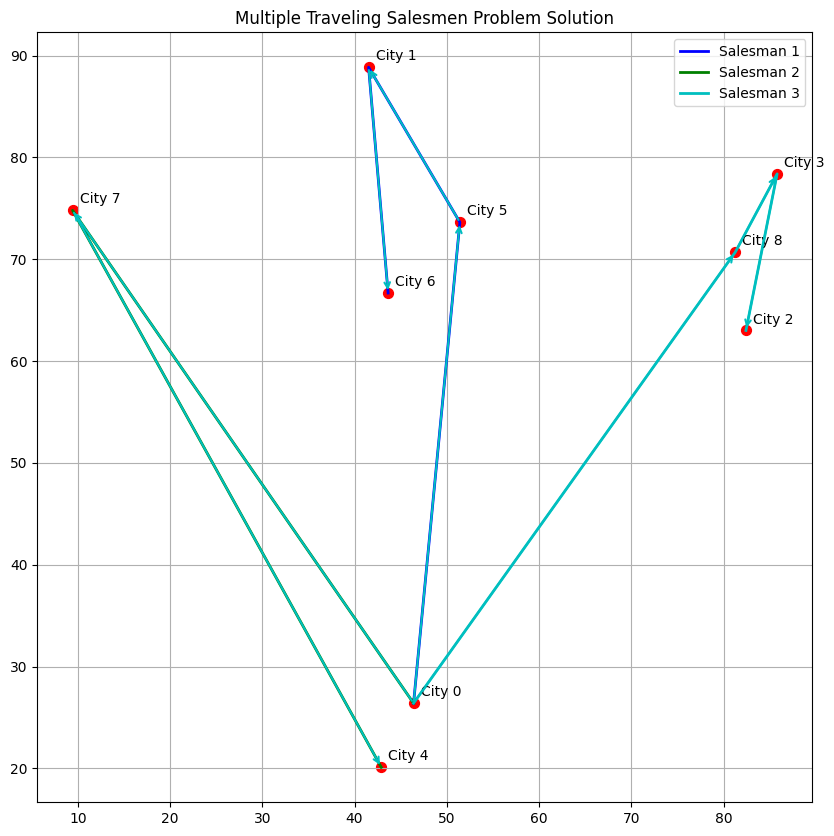

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# 結果の表示（既存のコード）
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Total distance: {pulp.value(prob.objective):.2f}")

# 可視化のための準備
plt.figure(figsize=(10, 10))
plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)
for i, city in enumerate(cities):
    plt.annotate(f'City {i}', (city[0], city[1]), xytext=(5, 5), textcoords='offset points')

colors = ['b', 'g', 'c', 'm', 'y', 'k']  # セールスマンごとに異なる色を使用

# 各セールスマンのルートを表示と可視化
for staff_index, route in return_dict.items():
    print(f"Staff {staff_index+1} route: {route}")
    
    # ルートの可視化
    route_coords = cities[route]
    plt.plot(route_coords[:, 0], route_coords[:, 1], c=colors[staff_index % len(colors)], linewidth=2, label=f'Salesman {staff_index+1}')
    
    # 矢印の追加
    for i in range(len(route) - 1):
        plt.annotate('', xy=cities[route[i+1]], xytext=cities[route[i]],
                     arrowprops=dict(arrowstyle='->', color=colors[k % len(colors)], lw=1.5))

plt.title('Multiple Traveling Salesmen Problem Solution')
plt.legend()
plt.grid(True)
plt.show()